# Summary
## 1. Общая информация
Анализ проведен на данных по валютам и акциям.

## 2. Пропущенные значения
- Валюта: 28% значений отсутствуют, что связано с выходными днями.
- Акции: 31% данных имеют пропуски из-за выходных, а 8% — истинные пропуски, которые не связаны с выходными. Они вызваны отсутствием торгов. Предлагается:
    - Заменить пропуски наиболее частым значением для акций с низкой волатильностью;
    - Исключить акции с высокой волатильностью и частыми пропусками.

## 3. Выбросы
- Валюта: Среднее количество выбросов составляет 2%, что считается нормой для выборки в 650+ наблюдений. Мелкие выбросы могут быть оставлены как индикаторы рыночных изменений. Валюты с высоким числом выбросов следует исключить.
- Акции: Среднее количество выбросов — 5%, что допустимо для выборки в 350+ наблюдений. Акции с высокой частотой выбросов рекомендуется исключить.

## 4. Однофакторный анализ
- Акции: Определяются акции с низкой дисперсией цены, что может указывать на ошибки сбора данных. Акции, у которых количество различных цен менее 10, считаются неторгуемыми и предполагаются к исключению на последующих этапах.

## 5. Двухфакторный анализ
- Валюта: Для анализа выбраны топ-5 наиболее используемых валют (GBP, AUD, SEK, NOK, MXN). Они показывают значительные различия, и почти все валюты положительно коррелируют друг с другом, что свидетельствует о движении рынка в одном направлении.
- Акции: Отобраны топ-10 дорогих акций с высокой дисперсией цен. Корреляционная тепловая карта подтверждает тенденцию к одновременному росту или падению рынка.

In [1]:
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(20 ,10)})
sns.set_palette(palette='mako')

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_currency = pd.read_parquet(path='../data/currency_raw.parquet')
df_stock = pd.read_parquet(path='../data/stock_raw.parquet')

# Общая информация

## Валюта

In [3]:
df_currency.shape

(665, 528)

In [4]:
df_currency.sample(5)

,USDRUB=X_Open,USDRUB=X_High,USDRUB=X_Low,USDRUB=X_Close,USDAFN=X_Open,USDAFN=X_High,USDAFN=X_Low,USDAFN=X_Close,USDEUR=X_Open,USDEUR=X_High,...,USDVND=X_Low,USDVND=X_Close,USDYER=X_Open,USDYER=X_High,USDYER=X_Low,USDYER=X_Close,USDZMW=X_Open,USDZMW=X_High,USDZMW=X_Low,USDZMW=X_Close
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-16 00:00:00+01:00,79.714996,80.739998,79.125000,79.714996,87.003265,87.003265,86.350349,86.0,0.91965,0.92109,...,23445.0,23452.0,249.850006,249.850006,249.850006,249.800003,18.647306,18.654085,18.647306,18.659225
2023-03-08 00:00:00+00:00,75.565002,76.536003,75.565002,75.565002,88.519241,88.519241,86.000000,87.0,0.94780,0.94997,...,23680.0,23640.0,249.899994,249.899994,249.850006,249.850006,20.292095,20.292095,20.123913,20.073927
2023-05-13 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-05 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-07 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_currency.index.min(), df_currency.index.max()

(Timestamp('2023-01-02 00:00:00+0000', tz='Europe/London'),
 Timestamp('2024-10-27 00:00:00+0100', tz='Europe/London'))

In [6]:
df_currency[df_currency.duplicated()].shape[0]

188

## Акции

In [7]:
df_stock.shape

(366, 16303)

In [8]:
df_stock.sample(5)

,A,AA,AAALY,AABB,AABVF,AACAF,AACAY,AACG,AACS,AACT,...,ZVSA,ZVTK,ZWBC,ZWS,ZYME,ZYXI,ZZHGF,ZZHGY,ZZLL,ZZZOF
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-10 00:00:00-04:00,142.740005,39.250000,34.650002,0.0329,0.03,4.300000,3.990000,0.91,0.0001,10.820,...,2.350000,0.0002,0.0002,35.950001,12.84,7.51,2.40000,2.0400,0.0001,0.0801
2023-11-15 00:00:00-05:00,112.834877,26.699839,34.650002,0.0195,0.02,1.846324,2.330312,0.86,0.0001,10.340,...,29.049999,0.0002,0.0002,29.309999,7.71,8.82,2.49133,2.8000,0.1897,0.1000
2024-08-07 00:00:00-04:00,133.747086,29.114418,34.650002,0.0289,0.03,3.360000,3.260000,0.65,0.0001,10.745,...,3.260000,0.0002,0.0002,29.809999,9.83,8.03,2.40000,1.9199,0.1897,0.0900
2024-01-26 00:00:00-05:00,130.327835,30.325867,34.650002,0.0170,0.02,2.249647,2.360188,1.08,0.0001,10.490,...,6.610000,0.0002,0.0002,29.680000,10.40,11.39,2.40000,2.1000,0.1897,0.1090
2024-06-02 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_stock.index.min(), df_stock.index.max()

(Timestamp('2023-10-25 00:00:00-0400', tz='America/New_York'),
 Timestamp('2024-10-24 00:00:00-0400', tz='America/New_York'))

In [10]:
df_stock[df_stock.duplicated()].shape[0]

113

# Пропущенные значения

## Валюта

In [11]:
df_percent_missing_currency = round(df_currency.isnull().sum() * 100 / len(df_currency))

df_missing_value_currency = pd.DataFrame(
    {'column': df_currency.columns, 'percent_missing': df_percent_missing_currency}
)
df_missing_value_currency.sort_values(by='percent_missing', ascending=False, inplace=True)

In [12]:
df_missing_value_currency

,column,percent_missing
USDZMW=X_Close,USDZMW=X_Close,28.0
USDRUB=X_Open,USDRUB=X_Open,28.0
USDRUB=X_High,USDRUB=X_High,28.0
USDRUB=X_Low,USDRUB=X_Low,28.0
USDRUB=X_Close,USDRUB=X_Close,28.0
...,...,...
USDDZD=X_Close,USDDZD=X_Close,28.0
USDXCD=X_Open,USDXCD=X_Open,28.0
USDXCD=X_High,USDXCD=X_High,28.0
USDXCD=X_Low,USDXCD=X_Low,28.0


In [13]:
df_missing_value_currency['percent_missing'].unique()

array([28.])

> Вся валюта имеет 28% пропущенных значений, это выходные.

## Акции

In [14]:
df_percent_missing_stock = round(df_stock.isnull().sum() * 100 / len(df_stock))

df_missing_value_stock = pd.DataFrame(
    {'column': df_stock.columns, 'percent_missing': df_percent_missing_stock}
)
df_missing_value_stock.sort_values(by='percent_missing', ascending=False, inplace=True)

In [15]:
df_missing_value_stock

,column,percent_missing
ICFNF,ICFNF,100.0
AHII,AHII,100.0
CABE,CABE,100.0
GBEN,GBEN,100.0
GGBL,GGBL,100.0
...,...,...
FNWB,FNWB,31.0
FNWD,FNWD,31.0
FNXTF,FNXTF,31.0
FOA,FOA,31.0


In [16]:
df_missing_value_stock['percent_missing'].unique()

array([100.,  99.,  98.,  97.,  96.,  95.,  94.,  93.,  92.,  91.,  90.,
        89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,  79.,
        78.,  77.,  76.,  75.,  74.,  73.,  72.,  71.,  70.,  69.,  68.,
        67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,  57.,
        56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,  46.,
        45.,  44.,  43.,  42.,  41.,  40.,  39.,  38.,  37.,  36.,  35.,
        34.,  33.,  32.,  31.])

In [17]:
df_missing_value_stock['percent_missing'].value_counts(normalize=True)

percent_missing
31.0     0.923572
99.0     0.012820
98.0     0.005398
86.0     0.005152
100.0    0.005091
           ...   
67.0     0.000184
45.0     0.000184
71.0     0.000184
56.0     0.000123
44.0     0.000123
Name: proportion, Length: 70, dtype: float64

> 92% данных имеют 31% пропусков, это опять таки выходные. Остальные 8% имеют истинные пропуски. Разберёмся в их природе.

In [18]:
# Рассмотрим пять случайных акций, процент пропуска в которых не связан с выходными.
df_missing_stocks = df_missing_value_stock[df_missing_value_stock['percent_missing'] != 31].sample(5)
df_missing_stocks

,column,percent_missing
AMNE,AMNE,87.0
ANCE,ANCE,99.0
CABE,CABE,100.0
WTRO,WTRO,99.0
DOMA,DOMA,37.0


In [19]:
df_missing_stocks = df_stock[df_missing_stocks.index.to_numpy()].copy()
df_missing_stocks

,AMNE,ANCE,CABE,WTRO,DOMA
Date,,,,,
2023-10-25 00:00:00-04:00,NaN,NaN,NaN,NaN,4.29
2023-10-26 00:00:00-04:00,NaN,NaN,NaN,NaN,4.22
2023-10-27 00:00:00-04:00,NaN,NaN,NaN,NaN,4.11
2023-10-28 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
2023-10-29 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-20 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
2024-10-21 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
2024-10-22 00:00:00-04:00,NaN,NaN,NaN,1.000000e-06,NaN


> Проверив цены акций на биржах, можно удостовериться, что пропуски вызваны не только выходными днями, но и тем что акции не торговались в этот период вовсе. А так как данные взяты за конкретную дату, то мы вынуждены поставить NaN значения. Выходом из этой ситуации может быть использование наиболее частого значения для акций с маленьким разбросом, а если разброс значений внутри акции слишком большой, от неё можно избавиться.

# Выбросы

In [20]:
def count_outliers(series: pd.Series) -> int:
    """
    Подсчёт кол-ва выбросов в серии без пропущенных значений с помощью IQR.

    Parameters
    ----------
    series : pd.DataFrame
        Кадр данных.

    Returns
    -------
    outliers : int
        Кол-во выбросов в серии.
    """
    series.dropna(inplace=True)
    
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = series[~((series >= lower_bound) & (series <= upper_bound))].shape[0]
    
    return outliers

## Валюта

In [21]:
df_outliers_count_currency = pd.DataFrame(
    data=df_currency.apply(lambda column: count_outliers(series=column)),
    columns=['outliers']
).sort_values(by='outliers', ascending=False)
df_outliers_count_currency = df_outliers_count_currency[df_outliers_count_currency['outliers'] > 0]

In [22]:
df_outliers_count_currency

,outliers
USDMVR=X_Low,142
USDMMK=X_Low,141
USDAED=X_Open,140
USDAED=X_Close,140
USDMMK=X_Close,128
...,...
USDTZS=X_Close,1
USDTHB=X_Open,1
USDTHB=X_High,1
USDMYR=X_Open,1


In [23]:
df_outliers_count_currency.value_counts(normalize=True)

outliers
1           0.339844
2           0.089844
3           0.080078
6           0.031250
12          0.021484
              ...   
98          0.001953
99          0.001953
100         0.001953
141         0.001953
142         0.001953
Name: proportion, Length: 87, dtype: float64

In [24]:
df_outliers_count_currency.mean()

outliers    19.085938
dtype: float64

In [25]:
df_outliers_count_currency.mean() / df_currency.shape[0]

outliers    0.028701
dtype: float64

> Среднее кол-во выбросов - 19, что составляет 2% от всех данных. Также можно заметить, что 50% процентов данных содержат до 10 выбросов, что является очень хорошим показателем для выборки из 650+ наблюдений. Если кол-во выбросов маленькое, то их можно оставить, так как они говорят о изменениях на рынке. Валюты с большим кол-вом выбросов можно отбросить.

## Акции

In [26]:
df_outliers_count_stock = pd.DataFrame(
    data=df_stock.apply(lambda column: count_outliers(series=column)),
    columns=['outliers']
).sort_values(by='outliers', ascending=False)
df_outliers_count_stock = df_outliers_count_stock[df_outliers_count_stock['outliers'] > 0]

In [27]:
df_outliers_count_stock

,outliers
ARCUF,125
RCDTF,122
MRGO,121
RSMDF,119
ALGLF,117
...,...
TRS,1
WTW,1
STSN,1
MSLOY,1


In [28]:
df_outliers_count_stock.value_counts(normalize=True)

outliers
1           0.100162
2           0.063927
3           0.051407
6           0.049197
4           0.048755
              ...   
91          0.000147
119         0.000147
121         0.000147
122         0.000147
125         0.000147
Name: proportion, Length: 116, dtype: float64

In [29]:
df_outliers_count_stock.mean()

outliers    18.325968
dtype: float64

In [30]:
df_outliers_count_stock.mean() / df_stock.shape[0]

outliers    0.050071
dtype: float64

> Среднее кол-во выбросов - 18, что составляет 5% от всех данных. Также можно заметить, что 50% процентов данных содержат до 15 выбросов, что является очень хорошим показателем для выборки из 350+ наблюдений. Если кол-во выбросов маленькое, то их можно оставить, так как они говорят о изменениях на рынке. Акции с большим кол-вом выбросов можно отбросить.

# Однофакторный анализ

## Акции

> Необходимо определить, какие акции имеют низкую дисперсию цены, возможно, это ошибка сбора. Оставим число различных цен равное 10.

In [31]:
df_nunique_stock = pd.DataFrame(
    data=df_stock.apply(lambda column: column.nunique()),
    columns=['nunique']
).sort_values(by='nunique', ascending=False)

df_nunique_stock = df_nunique_stock[df_nunique_stock['nunique'] < 10]

In [32]:
df_nunique_stock.shape[0] / df_stock.shape[0]

10.3551912568306

In [33]:
df_nunique_stock

,nunique
VLCJF,9
FIEB,9
ESPGY,9
WINSF,9
PPCLY,9
...,...
SFIN,1
SFPI,1
SFRFF,1
CTBG,1


> 10% акций имеют различное кол-во цен менее 10. Это значит, что такие акции практически не торгуются, либо торгуются с одинаковой ценой. Отложим на следующий этап вопрос об их исключении из датасета.

# Двухфакторный анализ

In [34]:
def plot_currencies(df: pd.DataFrame, title: str) -> None:
    """
    Обработка и отрисовка кадра данных.

    Parameters
    ----------
    df : pd.DataFrame
        Кадр данных.
    title : str
        Название графика.
    """
    df = df[df > 0].dropna()

    df.plot(title=title)

## Валюта

Возьмём топ-5 самых используемых валют для анализа (https://www.statista.com/statistics/1189498/share-of-global-payments-by-currency/), их колебания будут самыми важными:
1. GBP.
2. AUD.
3. SEK.
4. NOK.
5. MXN.

Посмотрим на распределение их цен в разных разрезах, а также на корреляцию валют между собой.

In [35]:
currencies_columns = df_currency.columns[df_currency.columns.str.contains('GBP|AUD|SEK|NOK|MXN')]

open_columns = currencies_columns[currencies_columns.str.contains('Open')]
high_columns = currencies_columns[currencies_columns.str.contains('High')]
low_columns = currencies_columns[currencies_columns.str.contains('Low')]
close_columns = currencies_columns[currencies_columns.str.contains('Close')]

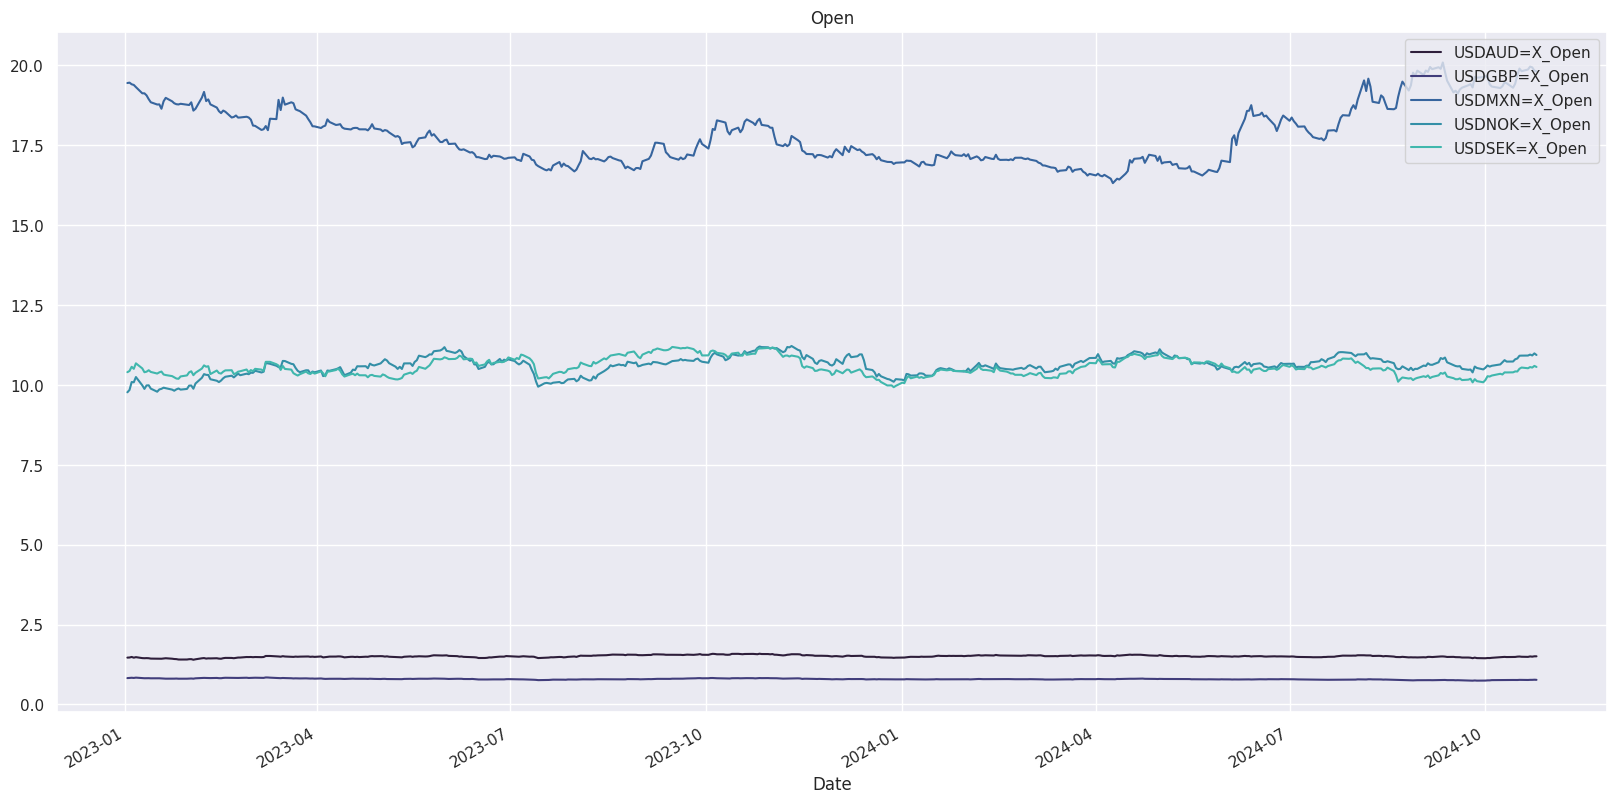

In [36]:
plot_currencies(df=df_currency[open_columns], title='Open')

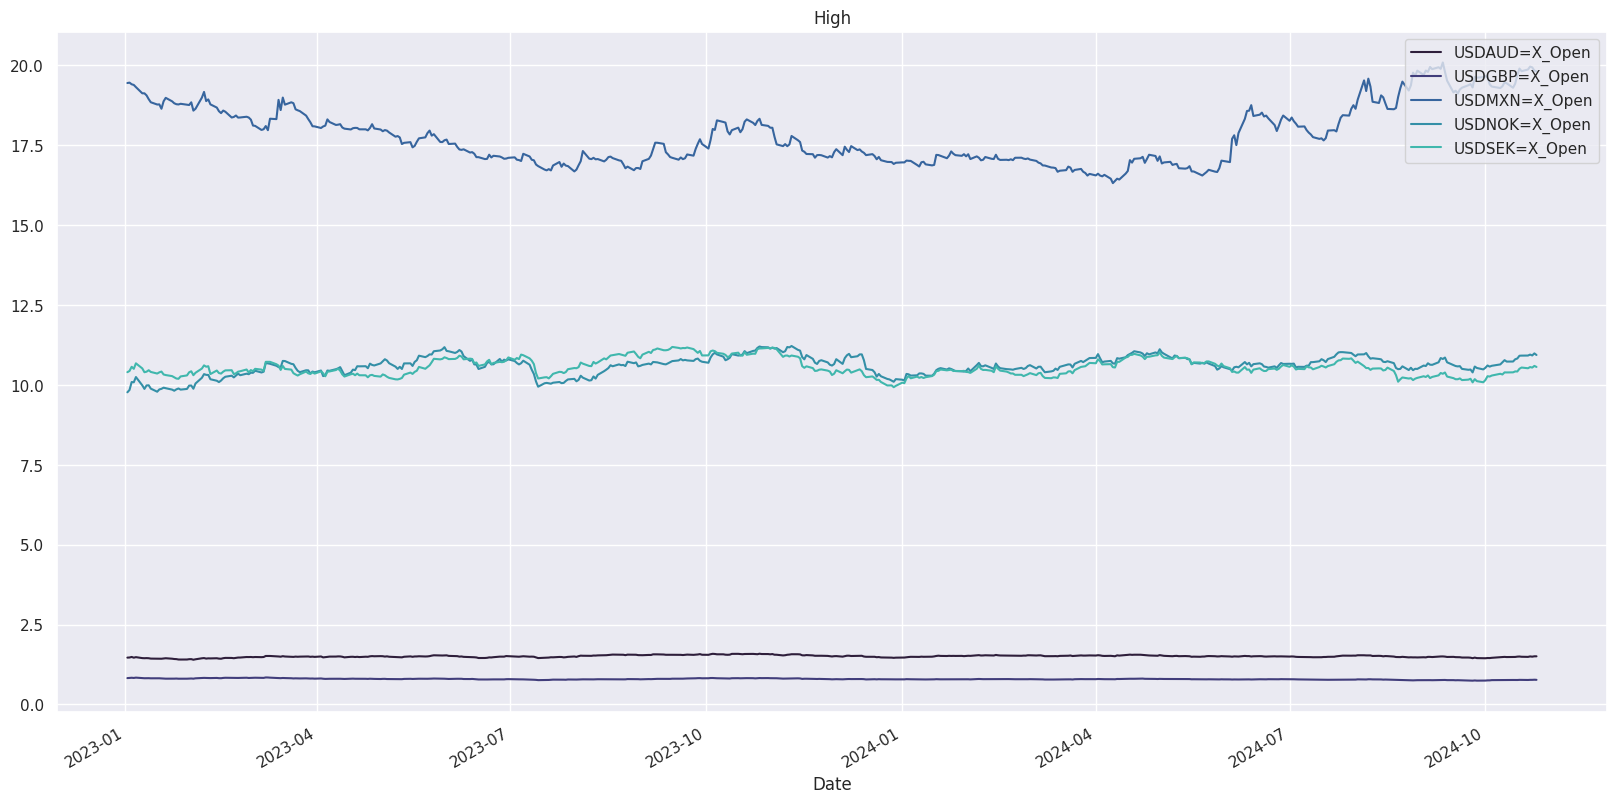

In [37]:
plot_currencies(df=df_currency[open_columns], title='High')

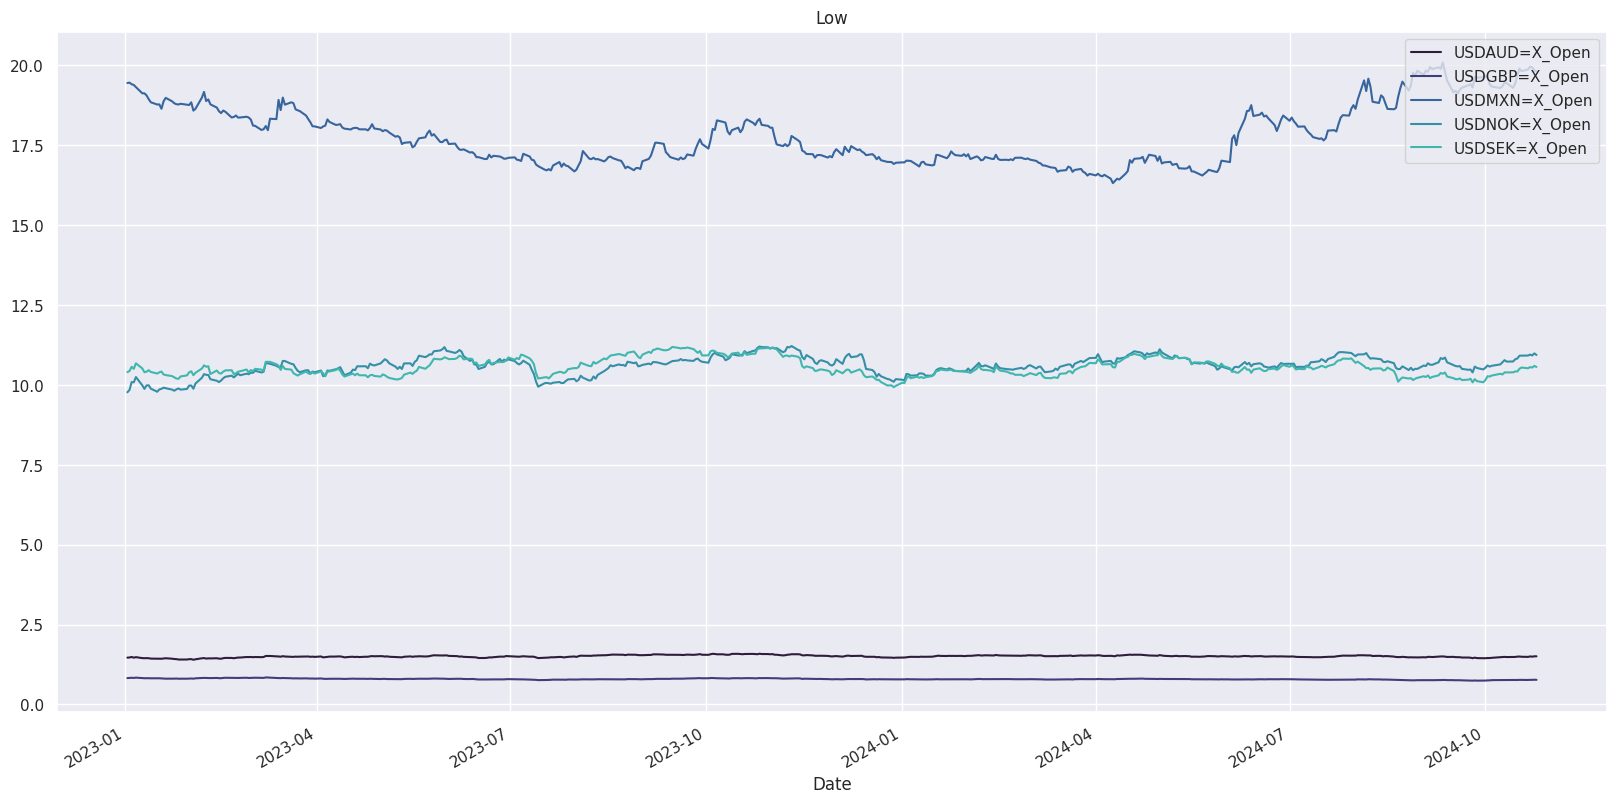

In [38]:
plot_currencies(df=df_currency[open_columns], title='Low')

> По графикам выше можно сделать вывод, что даже самые используемые валюты сильно различаются друг с другом: на фоне одних валют, другие ведут себя практически стационарно. Это знание будет полезно на этапе моделирования: возможно, к разным валютам можно будет применить разные правила моделирования.

<Axes: >

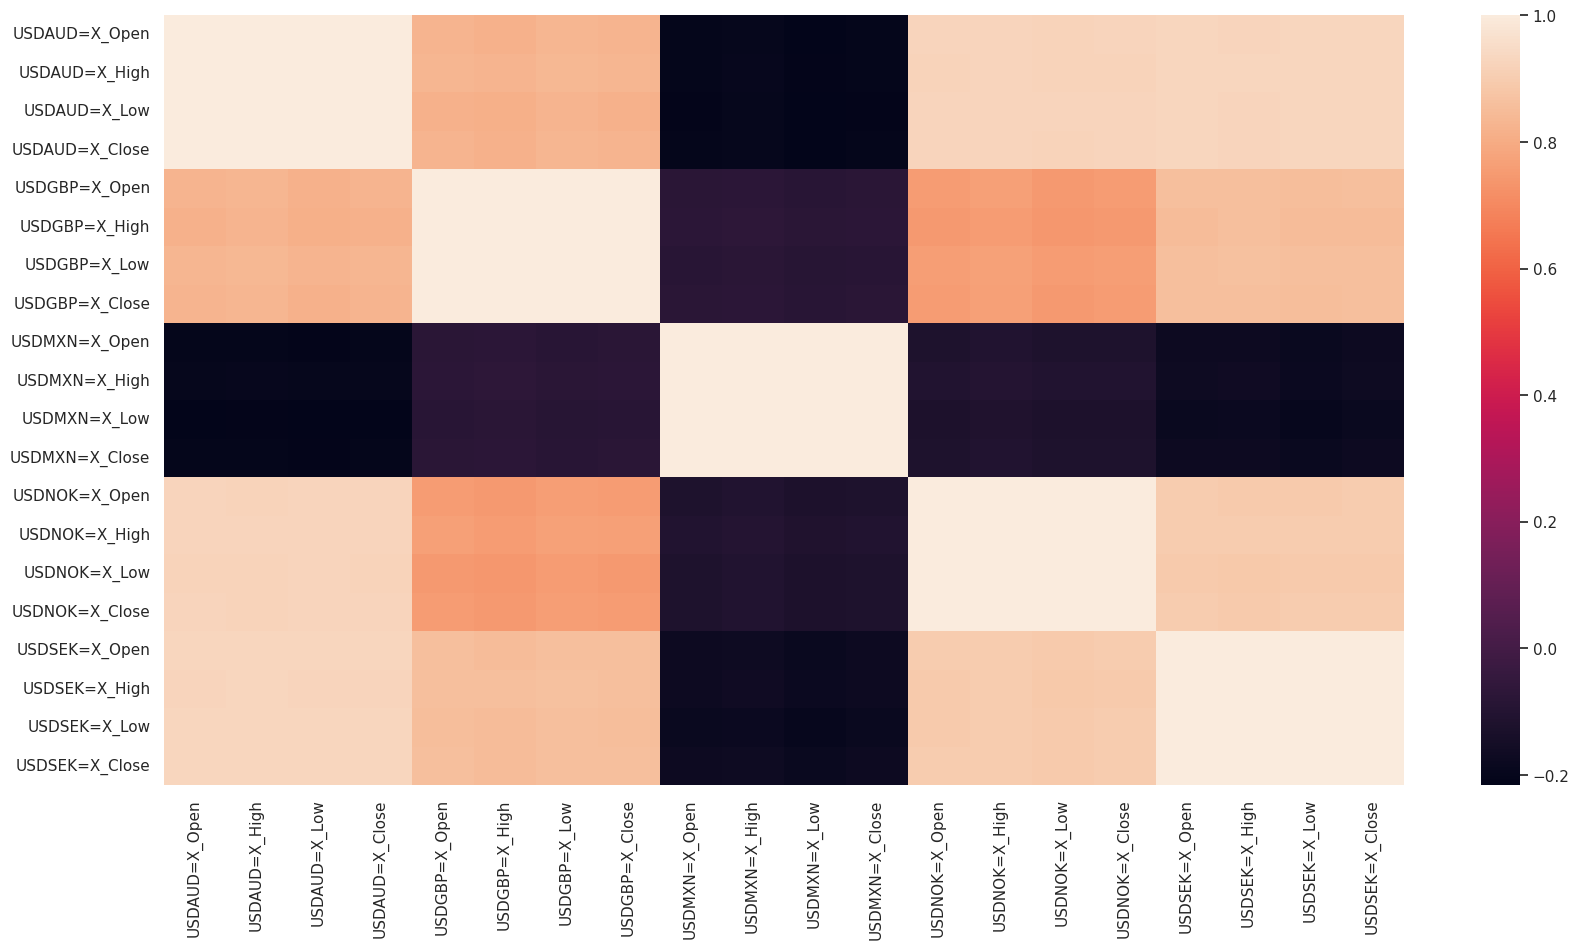

In [39]:
sns.heatmap(data=df_currency[currencies_columns].corr())

> Можем заметить, что почти все валюты положительно коррелируют друг с другом, это признак того, что рынок зачастую движется в одном направлении.

## Акции

Отберём топ-10 дорогих акций по медиане среди всех акций, имеющих высокую дисперсию.

In [40]:
valid_stocks = df_nunique_stock.index
top10_stocks = df_stock[valid_stocks].dropna(how='all').median().sort_values(ascending=False)[:10].index

top10_stocks

Index(['PNEXF', 'LWSOF', 'SFBTF', 'PCOA', 'COCXF', 'AFIPA', 'DLRWF', 'MCHB',
       'SPGZ', 'EZEN'],
      dtype='object')

<Axes: >

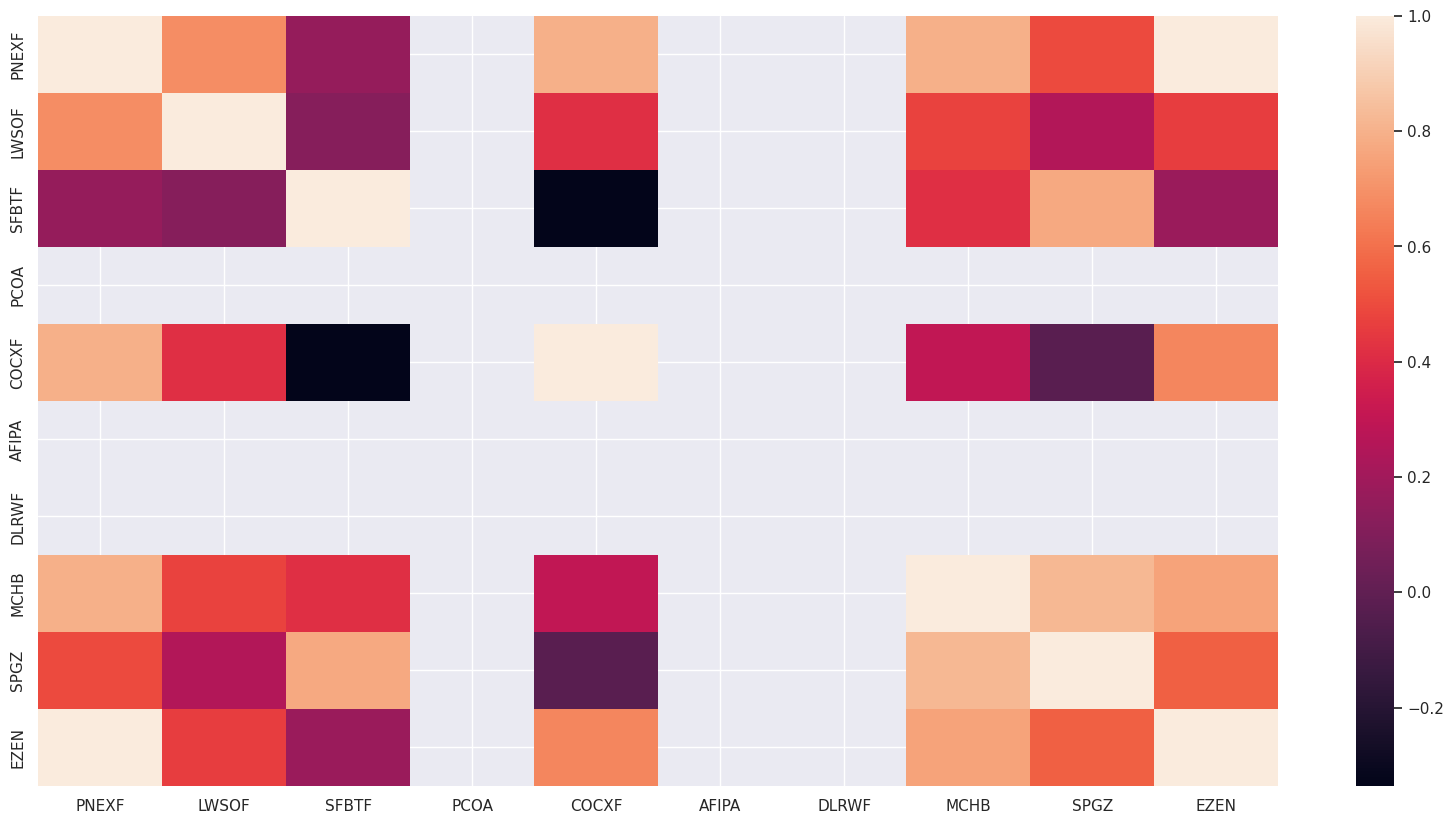

In [41]:
sns.heatmap(data=df_stock[top10_stocks].corr())

> По тепловой карте корреляций видно, что, хоть мы и имеем огромное кол-во пропусков (пропуски у акций, цена которых не изменяется), но акции коррелируют друг с другом, что опять говорит о том, что рынок в целом либо вместе растёт, либо вместе падает.